In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report   
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OrdinalEncoder

In [2]:

df = pd.read_csv("D:/2023-2024/HKII/DATASCIENCE/heart.csv")
df.head()

,id,age,sex,origin,chestpain,trestbps,cholesterol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145,233,1,lv hypertrophy,150,0,2.3,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160,286,0,lv hypertrophy,108,1,1.5,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120,229,0,lv hypertrophy,129,1,2.6,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130,250,0,normal,187,0,3.5,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130,204,0,lv hypertrophy,172,0,1.4,upsloping,0,normal,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           299 non-null    int64  
 1   age          299 non-null    int64  
 2   sex          299 non-null    object 
 3   origin       299 non-null    object 
 4   chestpain    299 non-null    object 
 5   trestbps     299 non-null    int64  
 6   cholesterol  299 non-null    int64  
 7   fbs          299 non-null    int64  
 8   restecg      299 non-null    object 
 9   thalch       299 non-null    int64  
 10  exang        299 non-null    int64  
 11  oldpeak      299 non-null    float64
 12  slope        299 non-null    object 
 13  ca           299 non-null    int64  
 14  thal         299 non-null    object 
 15  num          299 non-null    int64  
dtypes: float64(1), int64(9), object(6)
memory usage: 37.5+ KB


In [4]:
print(f"Table gồm  {df.shape[0]} hàng và {df.shape[1]} cột.")

Table gồm  299 hàng và 16 cột.


In [326]:
# Hàm để tính tỷ lệ ptram và mode cho các trường nhị phân hoặc rời rạc
def tilephantram_and_mode(df, column):
    value_counts = df[column].value_counts(normalize=True) * 100
    mode_value = df[column].mode()[0]
    unique_count = df[column].nunique()
    if unique_count == 2:
        column_type = 'Nhị phân'
    else:
        column_type = 'Rời rạc'
    return value_counts, mode_value, column_type

In [327]:
#dictionary luu kq
results = {}

In [328]:
# Kiểm tra từng cột và tính toán nếu là nhị phân hoặc rời rạc
for column in df.columns:
    if df[column].dtype == 'object' or df[column].nunique() <= 10:  # Điều kiện để xác định nhị phân hoặc rời rạc
        value_counts, mode_value, column_type = tilephantram_and_mode(df, column)
        results[column] = {'percentages': value_counts, 'mode': mode_value, 'type': column_type}

In [329]:
#hiện kq
for column, stats in results.items():
    print(f"\nCột: {column}")
    print("Tỷ lệ phần trăm giá trị:")
    print(stats['percentages'])
    print("Mode:", stats['mode'])
    print("Loại cột:", stats['type'])


Cột: sex
Tỷ lệ phần trăm giá trị:
sex
Male      67.892977
Female    32.107023
Name: proportion, dtype: float64
Mode: Male
Loại cột: Nhị phân

Cột: origin
Tỷ lệ phần trăm giá trị:
origin
Cleveland        99.331104
Hungary           0.334448
VA Long Beach     0.334448
Name: proportion, dtype: float64
Mode: Cleveland
Loại cột: Rời rạc

Cột: chestpain
Tỷ lệ phần trăm giá trị:
chestpain
asymptomatic       48.160535
non-anginal        27.759197
atypical angina    16.387960
typical angina      7.692308
Name: proportion, dtype: float64
Mode: asymptomatic
Loại cột: Rời rạc

Cột: fbs
Tỷ lệ phần trăm giá trị:
fbs
0    85.618729
1    14.381271
Name: proportion, dtype: float64
Mode: 0
Loại cột: Nhị phân

Cột: restecg
Tỷ lệ phần trăm giá trị:
restecg
normal              49.832776
lv hypertrophy      48.829431
st-t abnormality     1.337793
Name: proportion, dtype: float64
Mode: normal
Loại cột: Rời rạc

Cột: exang
Tỷ lệ phần trăm giá trị:
exang
0    66.889632
1    33.110368
Name: proportion, dtype: 

In [330]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [331]:
so = {}

In [332]:
# Tính toán các giá trị thống kê cho mỗi cột kiểu số
for column in numeric_columns:
    data = df[column].dropna()
    mean = data.mean()
    median = data.median()
    midrange = (data.min() + data.max()) / 2
    mode = data.mode()[0] if not data.mode().empty else np.nan
    min_value = data.min()
    max_value = data.max()
    five_number_summary = {
        "min": data.min(),
        "Q1": data.quantile(0.25),
        "median": data.median(),
        "Q3": data.quantile(0.75),
        "max": data.max()
    }
    so[column] = {
        "mean": mean,
        "median": median,
        "midrange": midrange,
        "mode": mode,
        "min": min_value,
        "max": max_value,
        "five_number_summary": five_number_summary
    }

In [333]:
# Hiển thị kết quả
for column, stats in so.items():
    print(f"\nColumn: {column}")
    print(f"Mean: {stats['mean']}")
    print(f"Median: {stats['median']}")
    print(f"Midrange: {stats['midrange']}")
    print(f"Mode: {stats['mode']}")
    print(f"Min: {stats['min']}")
    print(f"Max: {stats['max']}")
    print(f"Five-number summary: {stats['five_number_summary']}")


Column: id
Mean: 150.0
Median: 150.0
Midrange: 150.0
Mode: 1
Min: 1
Max: 299
Five-number summary: {'min': 1, 'Q1': 75.5, 'median': 150.0, 'Q3': 224.5, 'max': 299}

Column: age
Mean: 54.52173913043478
Median: 56.0
Midrange: 53.0
Mode: 58
Min: 29
Max: 77
Five-number summary: {'min': 29, 'Q1': 48.0, 'median': 56.0, 'Q3': 61.0, 'max': 77}

Column: trestbps
Mean: 131.71571906354515
Median: 130.0
Midrange: 147.0
Mode: 120
Min: 94
Max: 200
Five-number summary: {'min': 94, 'Q1': 120.0, 'median': 130.0, 'Q3': 140.0, 'max': 200}

Column: cholesterol
Mean: 246.7859531772575
Median: 242.0
Midrange: 332.0
Mode: 197
Min: 100
Max: 564
Five-number summary: {'min': 100, 'Q1': 211.0, 'median': 242.0, 'Q3': 275.5, 'max': 564}

Column: fbs
Mean: 0.14381270903010032
Median: 0.0
Midrange: 0.5
Mode: 0
Min: 0
Max: 1
Five-number summary: {'min': 0, 'Q1': 0.0, 'median': 0.0, 'Q3': 0.0, 'max': 1}

Column: thalch
Mean: 149.3277591973244
Median: 152.0
Midrange: 136.5
Mode: 162
Min: 71
Max: 202
Five-number summary

In [334]:
print(df.shape)  # Kích thước dữ liệu
print(df.dtypes)  # Kiểu dữ liệu của từng cột
print(df.head())  # Hiển thị vài dòng đầu tiên của tập dữ liệu

(299, 16)
id               int64
age              int64
sex             object
origin          object
chestpain       object
trestbps         int64
cholesterol      int64
fbs              int64
restecg         object
thalch           int64
exang            int64
oldpeak        float64
slope           object
ca               int64
thal            object
num              int64
dtype: object
   id  age     sex     origin        chestpain  trestbps  cholesterol  fbs  \
0   1   63    Male  Cleveland   typical angina       145          233    1   
1   2   67    Male  Cleveland     asymptomatic       160          286    0   
2   3   67    Male  Cleveland     asymptomatic       120          229    0   
3   4   37    Male  Cleveland      non-anginal       130          250    0   
4   5   41  Female  Cleveland  atypical angina       130          204    0   

          restecg  thalch  exang  oldpeak        slope  ca               thal  \
0  lv hypertrophy     150      0      2.3  downsloping   0

In [335]:
print(df.isnull().sum())
#gtri bị thíu

id             0
age            0
sex            0
origin         0
chestpain      0
trestbps       0
cholesterol    0
fbs            0
restecg        0
thalch         0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
dtype: int64


Text(0.5, 0, 'Age')

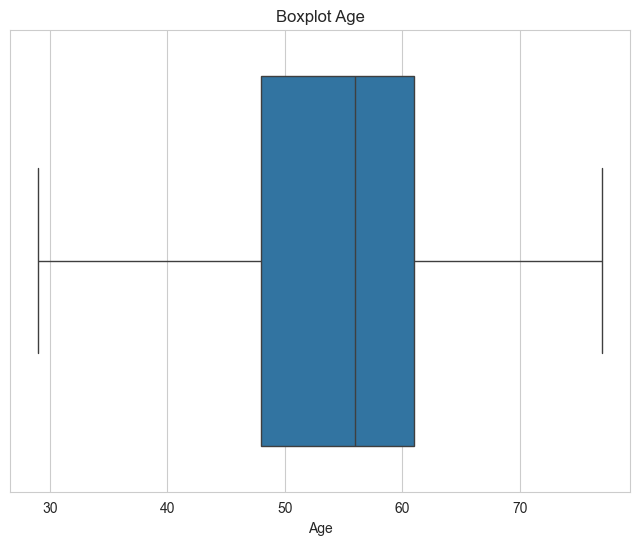

In [336]:
#phan 2 chon 3 thuộc tính
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot Age')
plt.xlabel('Age')


Text(0.5, 0, 'Trestbps')

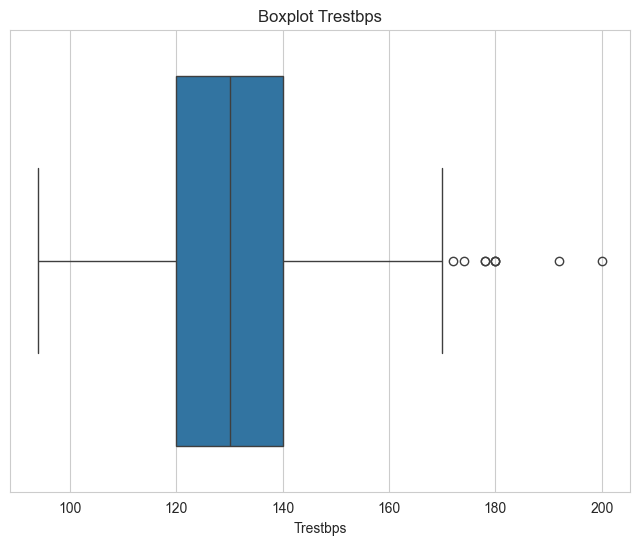

In [337]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['trestbps'])
plt.title('Boxplot Trestbps')
plt.xlabel('Trestbps')

Text(0.5, 0, 'Cholesterol')

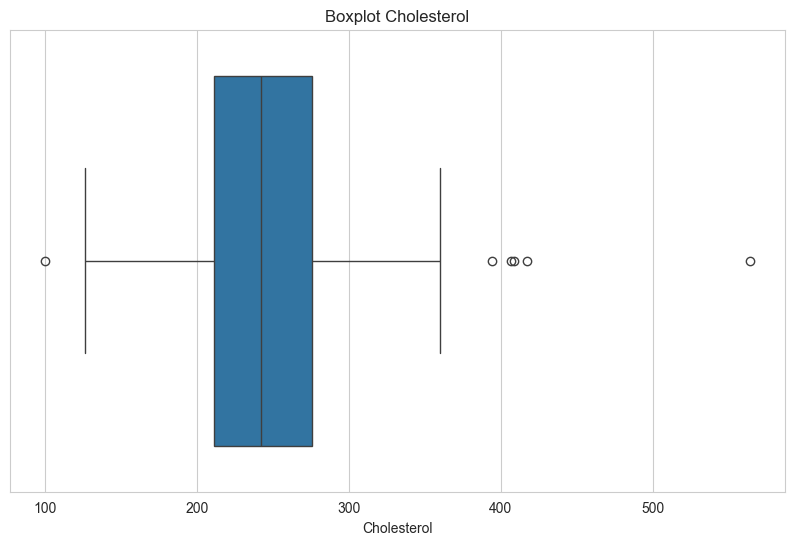

In [338]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['cholesterol'])
plt.title('Boxplot Cholesterol')
plt.xlabel('Cholesterol')

Text(0.5, 0, 'Thalch')

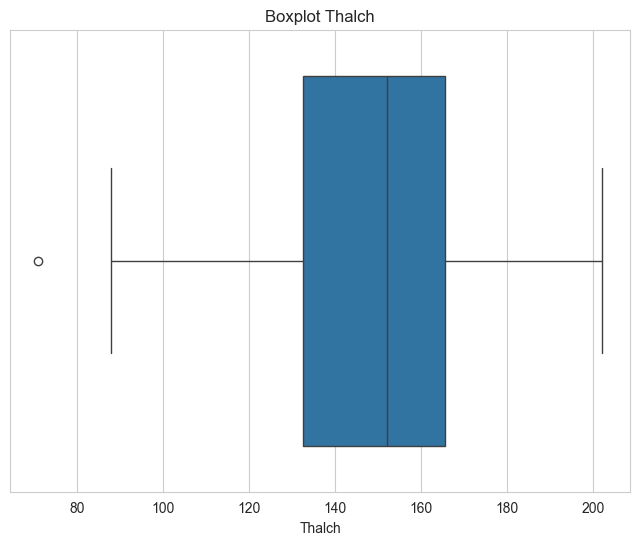

In [339]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['thalch'])
plt.title('Boxplot Thalch')
plt.xlabel('Thalch')

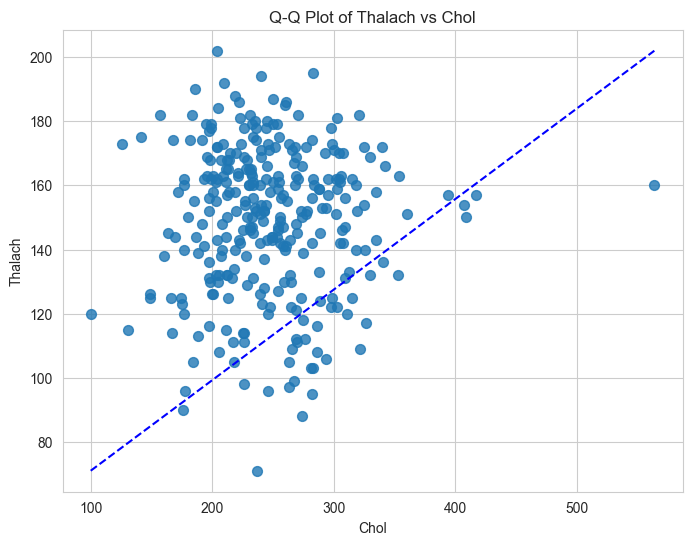

In [340]:
# Vẽ Q-Q Plot với trục y là 'Thalach' và trục x là 'Chol' sử dụng Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(x='cholesterol', y='thalch', data=df, fit_reg=False, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Vẽ đường chéo
plt.plot([df['cholesterol'].min(), df['cholesterol'].max()], [df['thalch'].min(), df['thalch'].max()], color='blue', linestyle='--')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Q-Q Plot of Thalach vs Chol')
plt.xlabel('Chol')
plt.ylabel('Thalach')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

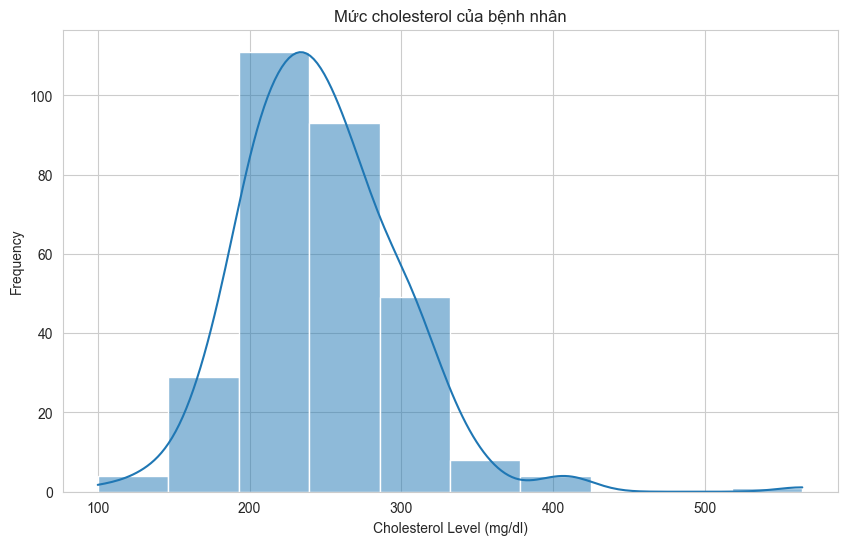

In [341]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cholesterol'], bins=10, kde=True)
plt.title('Mức cholesterol của bệnh nhân')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Frequency')
plt.show()


Text(0, 0.5, 'Frequency')

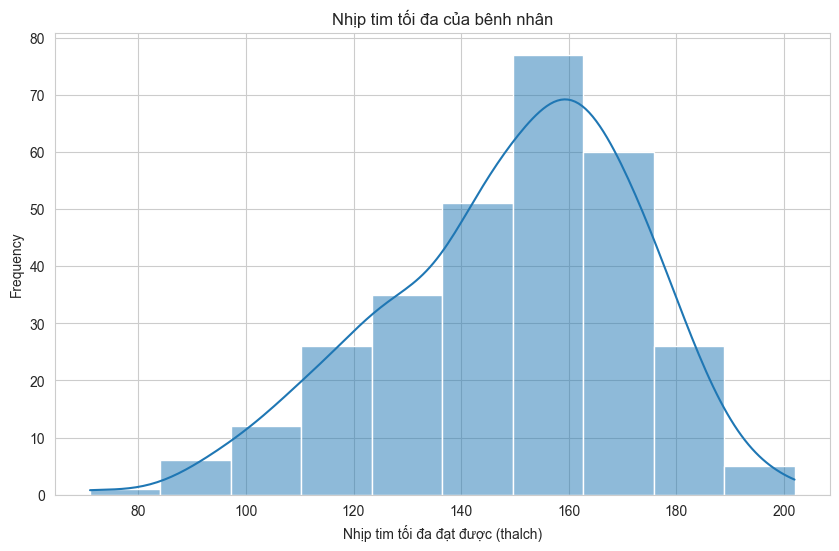

In [342]:
plt.figure(figsize=(10, 6))
sns.histplot(df['thalch'], bins=10, kde=True)
plt.title('Nhịp tim tối đa của bênh nhân')
plt.xlabel('Nhịp tim tối đa đạt được (thalch)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Maximum Heart Rate Achieved (thalach)')

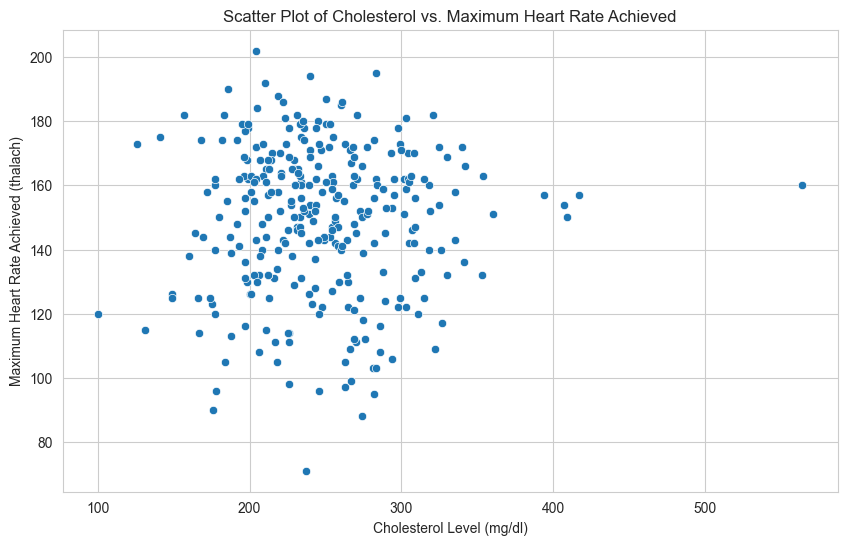

In [343]:
# Tạo biểu đồ scatter cho cholesterol và nhịp tim tối đa
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['cholesterol'], y=df['thalch'])
plt.title('Scatter Plot of Cholesterol vs. Maximum Heart Rate Achieved')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')

In [344]:
print("Unique values in restecg column:", df['restecg'].unique())

Unique values in restecg column: ['lv hypertrophy' 'normal' 'st-t abnormality']


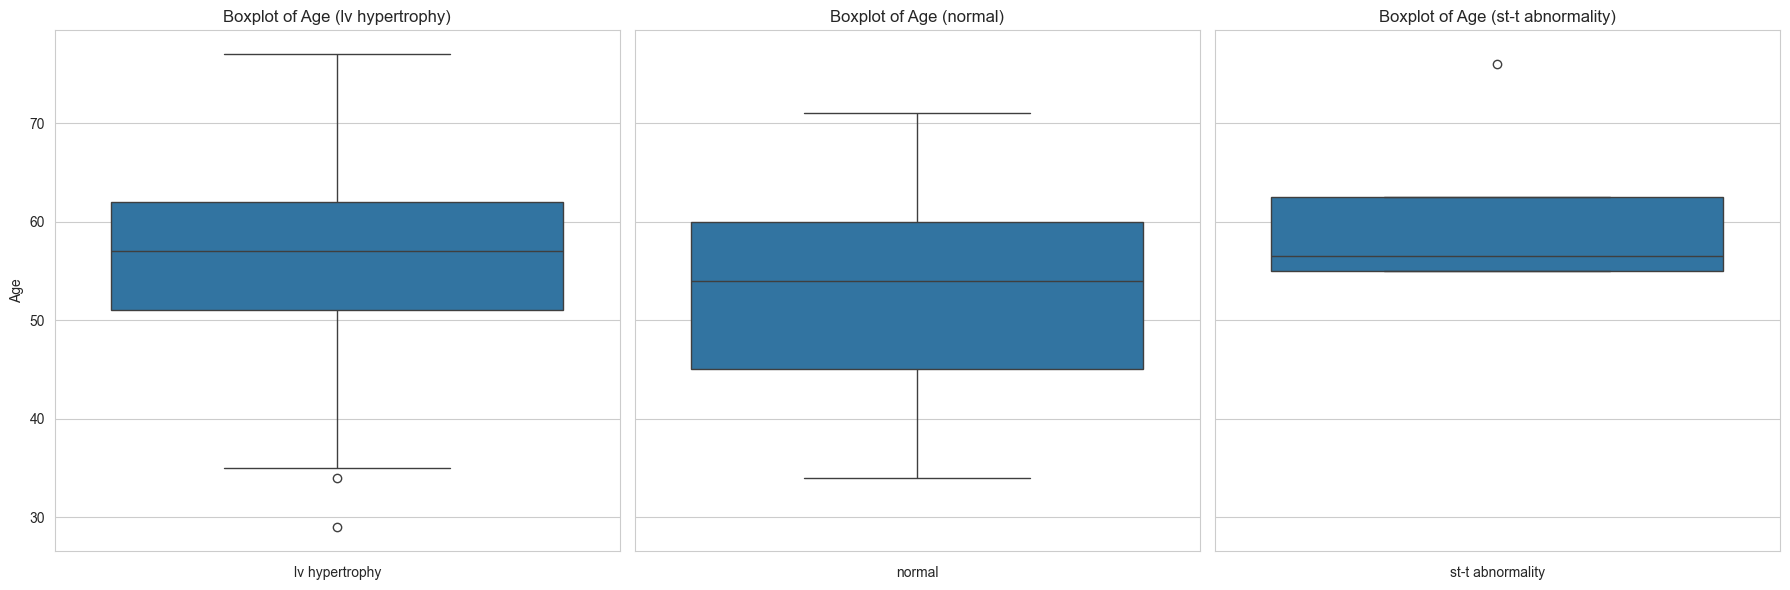

In [345]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Lấy danh sách các nhãn duy nhất trong cột 'restecg'
restecg_labels = df['restecg'].unique()

# Lặp qua từng nhãn để tạo boxplot
for i, label in enumerate(restecg_labels):
    sns.boxplot(y='age', data=df[df['restecg'] == label], ax=axes[i])
    axes[i].set_title(f'Boxplot of Age ({label})')
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('Age' if i == 0 else '')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

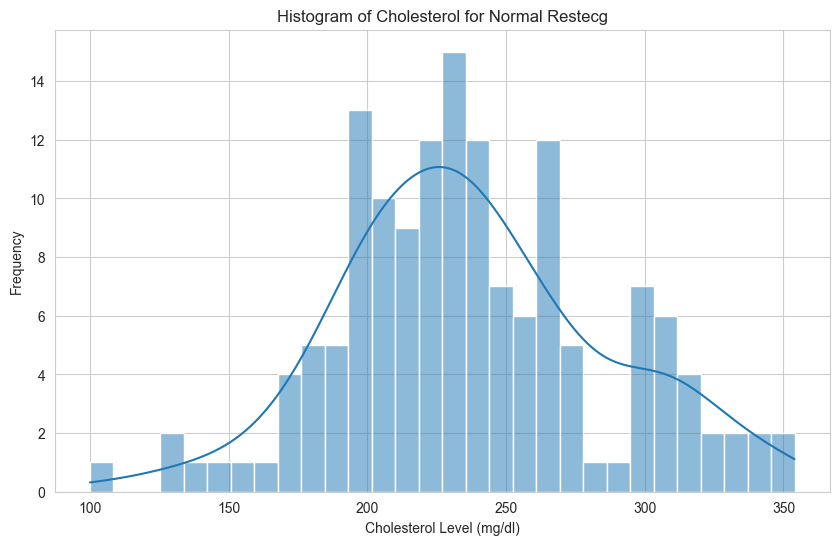

In [346]:
# Lọc dữ liệu chỉ lấy những hàng có giá trị 'restecg' là 'normal'
normal_cholesterol = df[df['restecg'] == 'normal']['cholesterol']

# Vẽ histogram cho 'cholesterol' với những hàng có 'restecg' là 'normal'
plt.figure(figsize=(10, 6))
sns.histplot(normal_cholesterol, bins=30, kde=True)
plt.title('Histogram of Cholesterol for Normal Restecg')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Frequency')
plt.show()

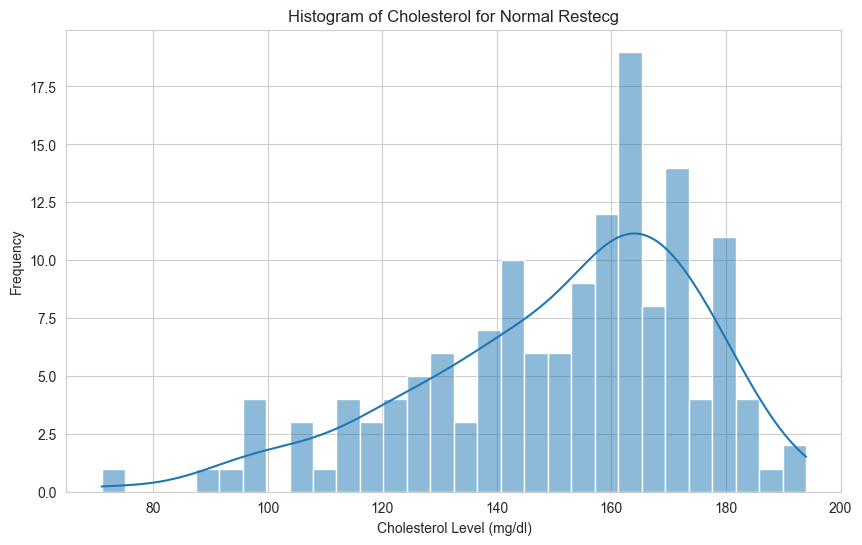

In [347]:
# Lọc dữ liệu chỉ lấy những hàng có giá trị 'restecg' là 'normal'
normal_cholesterol = df[df['restecg'] == 'normal']['thalch']

# Vẽ histogram cho 'cholesterol' với những hàng có 'restecg' là 'normal'
plt.figure(figsize=(10, 6))
sns.histplot(normal_cholesterol, bins=30, kde=True)
plt.title('Histogram of Cholesterol for Normal Restecg')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Frequency')
plt.show()

   Restecg  Thal  Fbs  Cholesterol
0        0     0    1          233
1        1     1    0          250
2        1     2    1          199
3        2     1    0          327
Ma trận tương quan:
               Restecg      Thal       Fbs  Cholesterol
Restecg      1.000000  0.500000 -0.707107     0.708602
Thal         0.500000  1.000000  0.000000    -0.256303
Fbs         -0.707107  0.000000  1.000000    -0.772907
Cholesterol  0.708602 -0.256303 -0.772907     1.000000


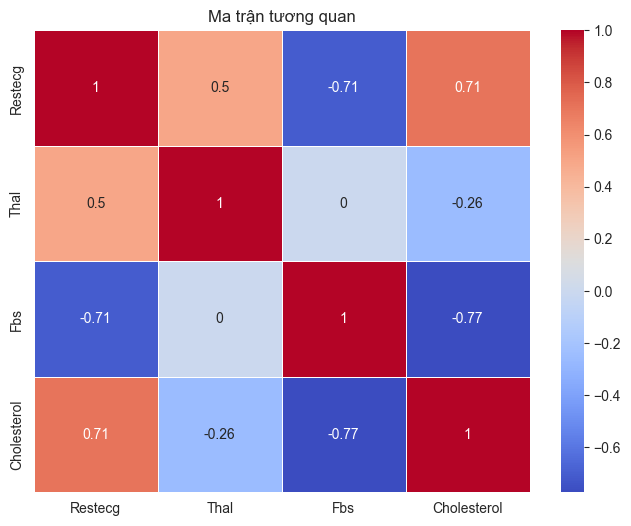

In [389]:
# Dữ liệu mẫu
tuongquan = {
    "Restecg": ["lv hypertrophy", "normal", "normal", "st-t abnormality"],
    "Thal": ["fixed defect", "normal", "reversable defect", "normal"],
    "Fbs": [True, False, True, False],
    "Cholesterol": [233, 250, 199, 327]
}
# Tạo DataFrame
df = pd.DataFrame(tuongquan)
# Mã hóa các giá trị phân loại thành số nguyên
label = {}
for column in ["Restecg", "Thal"]:
    label[column] = LabelEncoder()
    df[column] = label[column].fit_transform(df[column])

# Mã hóa cột Fbs
df["Fbs"] = df["Fbs"].astype(int)
# Tính toán ma trận tương quan
matrantuongquan = df.corr()
print(df)
# In ma trận tương quan
print("Ma trận tương quan:\n", matrantuongquan)

# Hiển thị ma trận tương quan bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrantuongquan, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan')
plt.show()

Tương quan dương ở mức trung bình (0.5) cho thấy khi giá trị của Restecg tăng thì giá trị của Thal cũng có xu hướng tăng theo và ngược lại.
Tương quan âm mạnh (-0.707) cho thấy khi giá trị của Restecg tăng thì giá trị của Fbs có xu hướng giảm và ngược lại.
Tương quan dương mạnh (0.709) cho thấy khi giá trị của Restecg tăng thì giá trị của Cholesterol cũng có xu hướng tăng và ngược lại.
Tương quan bằng 0 cho thấy không có mối quan hệ tuyến tính giữa Thal và Fbs.
Tương quan âm nhẹ (-0.256) cho thấy khi giá trị của Thal tăng thì giá trị của Cholesterol có xu hướng giảm, nhưng mối quan hệ này không mạnh.Tương quan âm mạnh (-0.773) cho thấy khi giá trị của Fbs tăng thì giá trị của Cholesterol có xu hướng giảm và ngược lại.

Ma trận phân sai kết hợp:
         1      2      3    4
1  0.0000  0.000  0.000  0.0
2  0.7925  0.000  0.000  0.0
3  0.4525  0.495  0.000  0.0
4  0.9225  0.380  0.875  0.0
Ma trận tương quan:
         1      2      3    4
1  1.0000  1.000  1.000  1.0
2  0.2075  1.000  1.000  1.0
3  0.5475  0.505  1.000  1.0
4  0.0775  0.620  0.125  1.0


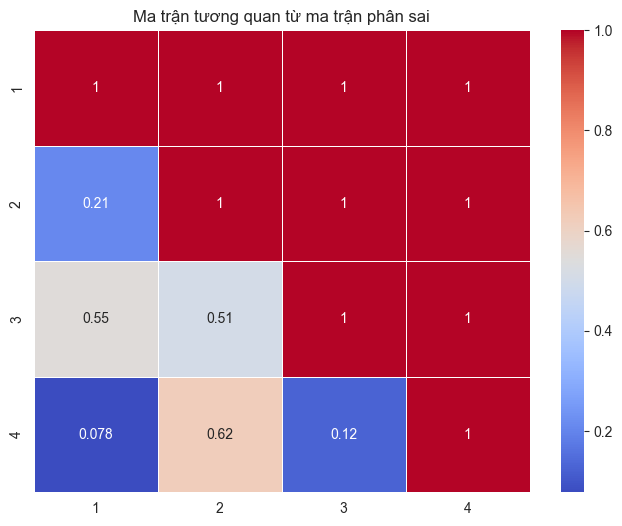

In [388]:
# Ma trận phân sai restecg
var_restecg = np.array([
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 1, 1, 0]
])
# Ma trận phân sai thuộc tính Thal
var_thal = np.array([
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [0.5, 0.5, 0, 0],
    [1.0, 0, 0.5, 0]
])

# Ma trận phân sai thuộc tính Fbs
var_fbs = np.array([
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [1, 0, 1, 0]
])

# Ma trận phân sai thuộc tính Cholesterol
var_cholesterol = np.array([
    [0, 0, 0, 0],
    [0.17, 0, 0, 0],
    [0.31, 0.48, 0, 0],
    [0.69, 0.52, 1, 0]
])
# Kết hợp các ma trận phân sai vào một ma trận duy nhất
combined_variance = (var_restecg + var_thal + var_fbs + var_cholesterol) / 4

# Tạo DataFrame từ ma trận phân sai kết hợp
df_combined = pd.DataFrame(combined_variance, columns=['1', '2', '3', '4'], index=['1', '2', '3', '4'])

print("Ma trận phân sai kết hợp:\n", df_combined)
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan từ ma trận phân sai
corr_matrix = 1 - df_combined

print("Ma trận tương quan:\n", corr_matrix)

# Hiển thị ma trận tương quan bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan từ ma trận phân sai')
plt.show()


In [370]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Dữ liệu mẫu
data = {
    "Restecg": [2, 0, 0, 1],
    "Thal": [1, 3, 2, 3],
    "Fbs": [1, 0, 1, 0],
    "Cholesterol": [233, 250, 199, 327]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Gộp các cột thành ma trận
data_matrix = df.to_numpy().T

# Tính độ đo cosine giữa các cột
cosine_sim = cosine_similarity(data_matrix)

# Đặt tên cho các cột
columns = ['Restecg', 'Thal', 'Fbs', 'Cholesterol']

# Lọc các cặp khác nhau (không phải là chính nó)
similar_pairs = [(columns[i], columns[j], cosine_sim[i, j]) for i in range(len(columns)) for j in range(i+1, len(columns))]
most_similar_pair = max(similar_pairs, key=lambda x: x[2])
least_similar_pair = min(similar_pairs, key=lambda x: x[2])
print("Giống nhau nhất:", most_similar_pair)
print("Khát nhau nhất:", least_similar_pair)

Giống nhau nhất: ('Thal', 'Cholesterol', 0.9597870297283536)
Khát nhau nhất: ('Thal', 'Fbs', 0.4423258684646914)


In [355]:
print(df.head(4))

   id  age   sex     origin       chestpain  trestbps  cholesterol  fbs  \
0   1   63  Male  Cleveland  typical angina       145          233    1   
1   2   67  Male  Cleveland    asymptomatic       160          286    0   
2   3   67  Male  Cleveland    asymptomatic       120          229    0   
3   4   37  Male  Cleveland     non-anginal       130          250    0   

          restecg  thalch  exang  oldpeak        slope  ca               thal  \
0  lv hypertrophy     150      0      2.3  downsloping   0       fixed defect   
1  lv hypertrophy     108      1      1.5         flat   3             normal   
2  lv hypertrophy     129      1      2.6         flat   2  reversable defect   
3          normal     187      0      3.5  downsloping   0             normal   

   num  
0    0  
1    2  
2    1  
3    0  


In [377]:
df_encoded = df.copy()
# Áp dụng mã hóa nhãn cho các cột phân loại
label= LabelEncoder()
for column in ['sex','origin', 'chestpain', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    df_encoded[column] = label.fit_transform(df_encoded[column])
# Hiển thị một số dòng đầu của DataFrame sau khi áp dụng mã hóa nhãn
print(df_encoded.head())


   id  age  sex  origin  chestpain  trestbps  cholesterol  fbs  restecg  \
0   1   63    1       0          3       145          233    1        0   
1   2   67    1       0          0       160          286    0        0   
2   3   67    1       0          0       120          229    0        0   
3   4   37    1       0          2       130          250    0        1   
4   5   41    0       0          1       130          204    0        0   

   thalch  exang  oldpeak  slope  ca  thal  num  
0     150      0      2.3      0   0     0    0  
1     108      1      1.5      1   3     1    2  
2     129      1      2.6      1   2     2    1  
3     187      0      3.5      0   0     1    0  
4     172      0      1.4      2   0     1    0  


In [378]:
# Thêm cột 'suytim' dựa trên cột 'num'
df_encoded['suytim'] = df_encoded['num'].apply(lambda x: 0 if x in [0, 1] else 1)
print(df_encoded.head())

   id  age  sex  origin  chestpain  trestbps  cholesterol  fbs  restecg  \
0   1   63    1       0          3       145          233    1        0   
1   2   67    1       0          0       160          286    0        0   
2   3   67    1       0          0       120          229    0        0   
3   4   37    1       0          2       130          250    0        1   
4   5   41    0       0          1       130          204    0        0   

   thalch  exang  oldpeak  slope  ca  thal  num  suytim  
0     150      0      2.3      0   0     0    0       0  
1     108      1      1.5      1   3     1    2       1  
2     129      1      2.6      1   2     2    1       0  
3     187      0      3.5      0   0     1    0       0  
4     172      0      1.4      2   0     1    0       0  


In [379]:
df_encoded = df_encoded.drop(columns=['num'])
print(df_encoded)

      id  age  sex  origin  chestpain  trestbps  cholesterol  fbs  restecg  \
0      1   63    1       0          3       145          233    1        0   
1      2   67    1       0          0       160          286    0        0   
2      3   67    1       0          0       120          229    0        0   
3      4   37    1       0          2       130          250    0        1   
4      5   41    0       0          1       130          204    0        0   
..   ...  ...  ...     ...        ...       ...          ...  ...      ...   
294  295   68    1       0          0       144          193    1        1   
295  296   57    1       0          0       130          131    0        1   
296  297   57    0       0          1       130          236    0        0   
297  298   47    1       1          0       150          226    0        1   
298  299   56    1       2          0       120          100    0        1   

     thalch  exang  oldpeak  slope  ca  thal  suytim  
0       

In [380]:
# Chia dữ liệu thành feature (X) và target (y)
X = df_encoded.drop(columns=['suytim'])
y = df_encoded['suytim']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Xây dựng và huấn luyện mô hình Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
# Chuẩn bị dữ liệu mới cho dự đoán
dataNB = {
    'age': 63,
    'sex': 1,
    'origin':0,
    'chestpain': 'atypical',
    'trestbps': 150,
    'cholesterol': 234,
    'fbs': 'yes',
    'restecg': 'st-t abnormality',
    'thalch': 120,
    'exang': 'no',
    'oldpeak': 2.6,
    'slope': 'upsloping',
    'ca': 2,
    'thal': 'reversable'
}
# Chuyển đổi dữ liệu mới thành DataFrame
new_df = pd.DataFrame([dataNB])
# Áp dụng mã hóa nhãn cho dữ liệu mới
for column in ['sex', 'chestpain', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    new_df[column] = label.fit_transform(new_df[column])
# Đảm bảo các cột trong dữ liệu mới khớp với các cột trong tập huấn luyện
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)
# Dự đoán giá trị 'num'
predicted_suytim = model.predict(new_df)[0]
print(f"Giá trị dự đoán của 'suy tim': {predicted_suytim}")

Giá trị dự đoán của 'suy tim': 1


In [381]:
from sklearn.naive_bayes import GaussianNB
# Huấn luyện mô hình Gaussian Naive Bayes (GNB)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_gnb = gnb_model.predict(X_test)

# Tính độ chính xác của mô hình GNB
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Độ chính xác Gaussian Naive Bayes: {accuracy_gnb:.4f}")

Độ chính xác Gaussian Naive Bayes: 0.7667


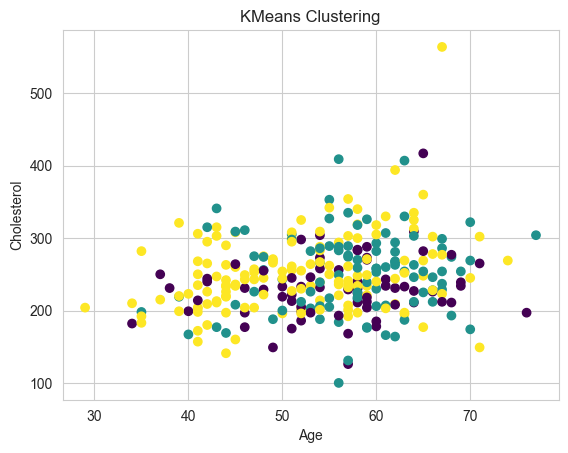

In [382]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Chuẩn bị dữ liệu (đảm bảo rằng bạn đã loại bỏ các cột không cần thiết và đã mã hóa các cột phân loại)
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)  # df_encoded là DataFrame đã được tiền xử lý và mã hóa
# Xây dựng mô hình KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Số lượng nhóm cần phân chia
kmeans.fit(scaled_data)
# Dự đoán nhóm cho toàn bộ dữ liệu
clusters = kmeans.predict(scaled_data)
plt.scatter(df_encoded['age'], df_encoded['cholesterol'], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('KMeans Clustering')
plt.show()


In [383]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Số lượng cụm bạn muốn tạo
kmeans.fit(df_encoded)

# Dự đoán nhãn cụm cho dữ liệu
clusters = kmeans.predict(df_encoded)

# In ra nhãn cụm của từng điểm dữ liệu
print("Cluster labels:")
print(clusters)

Cluster labels:
[0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0
 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0
 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 2 0 2 0
 0 2 2 0 0 0 2 2 2 2 0 0 2 0 2 0 0 0 2 0 0 2 0 2 0 2 0 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 1 2 1 2 2 1 2 1 1 2 1 2 2 1 2 2 1 1
 1 2 1 1 2 2 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [384]:

kmeans_14 = KMeans(n_clusters=3, random_state=42, max_iter=1)
kmeans_14.fit(df_encoded)
clusters_14 = kmeans_14.predict(df_encoded)
kmeans_15 = KMeans(n_clusters=3, random_state=42, max_iter=2)
kmeans_15.fit(df_encoded)
clusters_15 = kmeans_15.predict(df_encoded)
num_different_points = np.sum(clusters_14 != clusters_15)

# In ra kết quả
print("Số lượng điểm dữ liệu khác nhau giữa hai mô hình:", num_different_points)

Số lượng điểm dữ liệu khác nhau giữa hai mô hình: 15


In [385]:
print(df_encoded)

      id  age  sex  origin  chestpain  trestbps  cholesterol  fbs  restecg  \
0      1   63    1       0          3       145          233    1        0   
1      2   67    1       0          0       160          286    0        0   
2      3   67    1       0          0       120          229    0        0   
3      4   37    1       0          2       130          250    0        1   
4      5   41    0       0          1       130          204    0        0   
..   ...  ...  ...     ...        ...       ...          ...  ...      ...   
294  295   68    1       0          0       144          193    1        1   
295  296   57    1       0          0       130          131    0        1   
296  297   57    0       0          1       130          236    0        0   
297  298   47    1       1          0       150          226    0        1   
298  299   56    1       2          0       120          100    0        1   

     thalch  exang  oldpeak  slope  ca  thal  suytim  
0       